In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import ttest_ind

an explanation of each column in the Boston Housing Dataset:

1. CRIM: This represents the per capita crime rate by town. It indicates the crime rate in each town in Boston.

2. ZN: This column represents the proportion of residential land zoned for lots larger than 25,000 square feet. It provides information about the amount of land zoned for large residential lots.

3. INDUS: This refers to the proportion of non-retail business acres per town. It represents the proportion of non-retail business land in each town.

4. CHAS: This is the Charles River dummy variable, which takes the value 1 if the town borders the Charles River and 0 otherwise. It indicates whether a town is located on the bank of the Charles River.

5. NOX: This column represents the nitric oxides concentration (parts per 10 million). It provides information about the level of air pollution due to nitric oxides in each town.

6. RM: This refers to the average number of rooms per dwelling. It indicates the average number of rooms in houses in each town.

7. AGE: This column represents the proportion of owner-occupied units built prior to 1940. It provides information about the age of the houses in each town.

8. DIS: This refers to the weighted distances to five Boston employment centers. It provides information about the proximity of each town to employment centers in Boston.

9. RAD: This represents the index of accessibility to radial highways. It indicates the accessibility of each town to radial highways.

10. TAX: This represents the full-value property-tax rate per $10,000. It provides information about the property tax rate in each town.

11. PTRATIO: This column represents the pupil-teacher ratio by town. It indicates the average number of students per teacher in the schools of each town.

12. B: This column represents the proportion of people of African descent by town. It provides information about the racial diversity of each town.

13. LSTAT: This represents the percentage of lower-status population. It indicates the percentage of the population in each town that has a lower socioeconomic status.

14. MEDV: This is the target variable, the median value of owner-occupied homes in $1000s. It represents the median value of houses in each town.

In [11]:
boston_df = pd.read_csv('boston_housing.csv')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [ ]:
#Descriptive Statistics

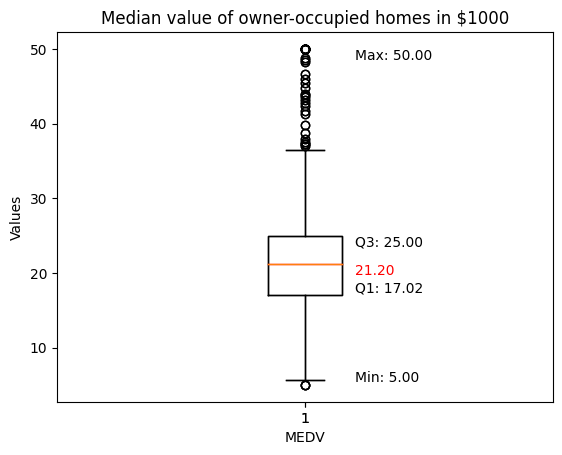

In [54]:
plt.boxplot(boston_df['MEDV'], medianprops={'color': 'red'})
plt.title('Median value of owner-occupied homes in $1000')
plt.xlabel('MEDV')
plt.ylabel('Values')

median_value = plt.boxplot(boston_df['MEDV'])['medians'][0].get_ydata()[0]
plt.text(1.1, median_value, f'{median_value:.2f}', color='red', ha='left', va='top')

quatile1 = boston_df['MEDV'].quantile(0.25)
quatile3 = boston_df['MEDV'].quantile(0.75)
mini = boston_df['MEDV'].min()
maxi = boston_df['MEDV'].max()

plt.text(1.1, quatile1, f'Q1: {quatile1:.2f}', color='black', ha='left', va='bottom')
plt.text(1.1, quatile3, f'Q3: {quatile3:.2f}', color='black', ha='left', va='top')
plt.text(1.1, mini, f'Min: {mini:.2f}', color='black', ha='left', va='bottom')
plt.text(1.1, maxi, f'Max: {maxi:.2f}', color='black', ha='left', va='top')

plt.show()

The median value of 21.20 indicates that approximately half of the owner-occupied homes in Boston possess a median value equal to or below 21.20 (in $1000s), while the remaining half have a median value equal to or above 21.20.

In essence, this suggests that the majority of houses in Boston are valued at around 21,200 USD on average, with a range typically falling between 17,020 USD and 25,000 USD.

In [53]:
plt.clf()

<Figure size 640x480 with 0 Axes>

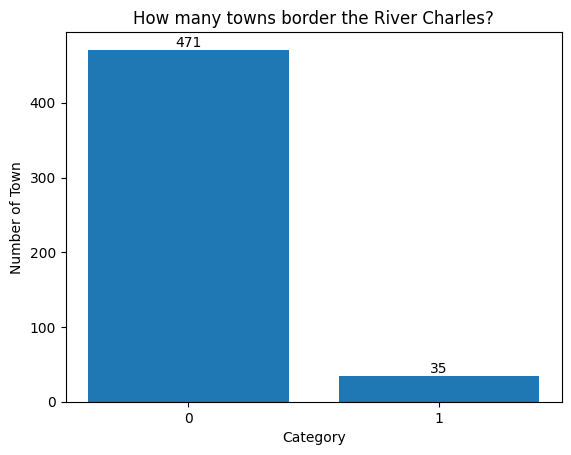

In [71]:
chas_counts = boston_df['CHAS'].value_counts()

plt.bar(chas_counts.index, chas_counts.values)
plt.xticks(chas_counts.index, chas_counts.index)

for i, count in enumerate(chas_counts.values):
    plt.text(chas_counts.index[i], count, str(count), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Number of Town')
plt.title('How many towns border the River Charles?')
plt.show()

The presence of 35 towns bordering the Charles River suggests that living in a river-bordering town is relatively uncommon compared to towns without such a feature. This rarity implies that properties with riverfront access or scenic river views may be scarce and highly sought after, potentially commanding higher market value.

Towns bordering the Charles River have distinct characteristics due to their proximity to the river. These include picturesque views, ample recreational opportunities, and a unique ambiance not found in towns without a river border. Residents can enjoy water-based activities, access to parks and trails, and the natural beauty of the river.

Understanding the lower prevalence of river-bordering towns and their unique attributes provides valuable insights into the local housing market and the preferences of potential buyers or residents.

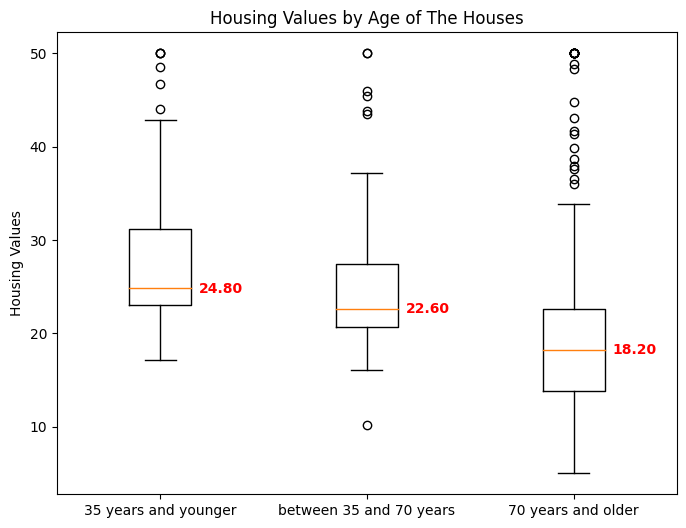

In [105]:
# Create age bins and labels
age_bins = [0, 35, 70, float('inf')]
age_labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']

# Discretize the AGE variable into age groups
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=[bin for bin in age_bins], labels=age_labels)#, right=False)

#if right=False then [0,35), [35,70), [70, inf) 

# Create boxplot
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot([boston_df[boston_df['Age_Group'] == label]['MEDV'] for label in age_labels], labels=age_labels)
#plt.xlabel('Age of The Houses')
plt.ylabel('Housing Values')
plt.title('Housing Values by Age of The Houses')


for median in boxplot['medians']:
    y = median.get_ydata()[0]
    x = median.get_xdata()[0] + 0.55
    plt.text(x, y, f'{y:.2f}', verticalalignment='center', horizontalalignment='right', color='red', fontweight='bold')

plt.show()


#with right=False, the interval [35, 70) would include values greater than or equal to 35 and strictly less than 70. 
#The left endpoint, 35, is included, and the right endpoint, 70, is excluded.


The analysis reveals that median home values vary across different age groups, with younger towns generally having higher median values. 

Among towns with a majority of homes 35 years or younger, the median value is $24.80 (in $1000s), indicating a higher demand and pricing for newer housing. 

In towns where homes are between 35 and 70 years old, the median value slightly decreases to $22.60, suggesting a potential influence of age on market value. 

Older towns, with a significant proportion of homes built prior to 1940, have a lower median value of $18.20, likely due to factors such as maintenance and renovations. 

In summary, newer towns tend to have higher median home values, while older towns exhibit lower values.

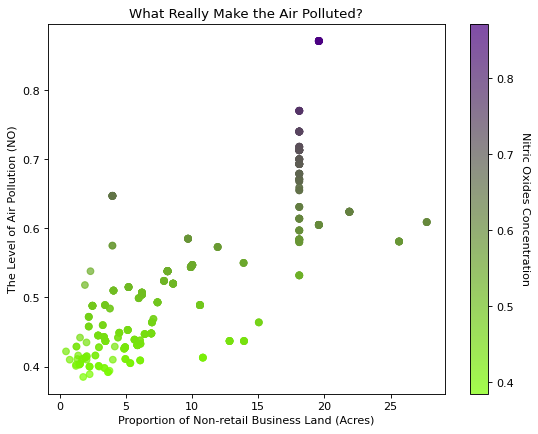

In [118]:
#3. INDUS: This refers to the proportion of non-retail business acres per town. 
#It represents the proportion of non-retail business land in each town.

#Examples of non-retail businesses can include manufacturing facilities, office buildings, 
#warehouses, and other commercial establishments that are not primarily focused on retail sales to the public.

#5. NOX: This column represents the nitric oxides concentration (parts per 10 million). 
#It provides information about the level of air pollution due to nitric oxides in each town.

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set figure size and dpi
plt.figure(figsize=(8, 6), dpi=80)

# Define scatter plot colors
colors = boston_df['NOX']

# Create a custom colormap from light green to dark purple
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#7CFC00', '#4B0082'])

# Scatter plot
plt.scatter(boston_df['INDUS'], boston_df['NOX'], c=colors, cmap=cmap, alpha=0.7)

# Set axis labels and title
plt.xlabel('Proportion of Non-retail Business Land (Acres)')
plt.ylabel('The Level of Air Pollution (NO)')
plt.title('What Really Make the Air Polluted?')

# Add a colorbar with custom colormap
cbar = plt.colorbar()
cbar.set_label('Nitric Oxides Concentration', rotation=270, labelpad=15)

# Show the plot
plt.show()




The scatter plot shows a positive correlation between NOX (nitric oxides concentration) and INDUS (proportion of non-retail business acres per town). As INDUS increases, so does the NOX concentration. 

This suggests that towns with more non-retail business land tend to have higher levels of air pollution, 
specifically nitric oxides. 

The plot highlights the association between industrial areas and increased air pollution in the towns.

Additionally, it is important to consider the impact of air quality on property values when determining prices 
and negotiating deals, as air pollution can influence the desirability and market value of houses.

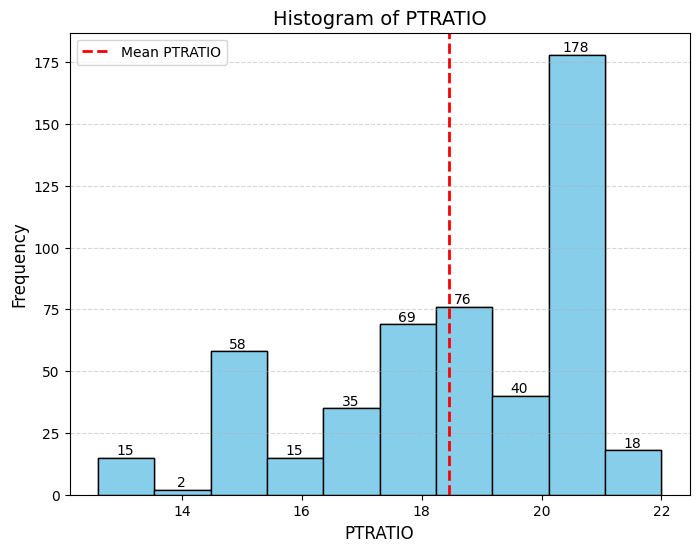

In [138]:
#PTRATIO

#import matplotlib.pyplot as plt

# Create histogram
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10, edgecolor='black', color='skyblue')

# Set labels and title
plt.xlabel('PTRATIO', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of PTRATIO', fontsize=14)

# Customize the tick labels and grid lines
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add a vertical line for the mean
mean_ptratio = boston_df['PTRATIO'].mean()
plt.axvline(mean_ptratio, color='red', linestyle='--', linewidth=2, label='Mean PTRATIO')
plt.legend()

# Get the frequency values for each bin
n, bins, patches = plt.hist(boston_df['PTRATIO'], bins=10, edgecolor='black', color='skyblue')

# Annotate each bin with its frequency
for i in range(len(patches)):
    plt.text(bins[i]+0.45, n[i], str(int(n[i])), ha='center', va='bottom')

# Show the histogram
plt.show()



The pupil-to-teacher ratio (PTRATIO) provides insights into class sizes and the level of individualized attention students may receive. A lower PTRATIO suggests smaller class sizes and potentially more personalized attention, while a higher PTRATIO indicates larger class sizes and potentially less individualized attention.

For homebuyers and families with school-aged children, the PTRATIO is an important consideration. A lower PTRATIO is generally viewed as favorable, as it is associated with smaller class sizes and potentially higher-quality education. Areas with lower PTRATIO values may be more desirable for families, leading to increased housing demand and potentially higher property values.

In [ ]:
#Inferential Statistics

1. Question: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis (H0): There is no significant difference in the median value of houses between those bounded by the Charles river and those not bounded by the river.

Alternative Hypothesis (H1): There is a significant difference in the median value of houses between those bounded by the Charles river and those not bounded by the river.


In [141]:
# Independent t-test

# Split the dataset into two groups based on Charles river boundary
river_houses = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_river_houses = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
ttest_ind(river_houses, non_river_houses)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Result**

A p-value of 7.390623170519905e-05 (or 0.00007390623170519905) indicates a very small value (p < .05), 
which suggests strong evidence against the null hypothesis. 

In other words, it suggests that there is a significant difference in the median value of houses bounded by the Charles river compared to those not bounded by the river.

2. Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis (H0): There is no deifference in MEDV among the age groups of towns.

Alternative Hypothesis (H1): There is a significant difference in MEDV among the age groups of towns.

In [145]:
# ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create age bins and labels
age_bins = [0, 35, 70, float('inf')]
age_labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']

# Discretize the AGE variable into age groups
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

# Perform two-way ANOVA
model = ols('MEDV ~ Age_Group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model)

# Print the results
print(anova_table)

              df        sum_sq      mean_sq         F        PR(>F)
Age_Group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


The Age_Group variable significantly impacts the median values of houses (MEDV) as evidenced by 
the low p-value and high F-statistic. 

This indicates a significant difference in median values among the different age groups of houses.

This information can be valuable for understanding the impact of age on housing values and making informed decisions related to real estate.

3. Question: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis (H0): there is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).

Alternative Hypothesis (H1): there is a significant relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).

In [147]:
# Correlation

import scipy.stats as stats

correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

Correlation coefficient: 0.7636514469209151
p-value: 7.913361061238693e-98


The analysis reveals a strong positive correlation (r = 0.764, p < 0.001) between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). 

This suggests that areas with a higher proportion of non-retail business land tend to have higher Nitric oxide concentrations, possibly due to industrial or commercial activities in those areas.

4. Question: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypothesis (H0): There is no significant impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).

Alternative Hypothesis (H1): There is a significant impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).

In [149]:
# Regression Analysis

# Add a constant term to the data
boston_df['intercept'] = 1

# Set DIS as the independent variable and MEDV as the dependent variable
X = boston_df[['DIS', 'intercept']]
y = boston_df['MEDV']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        08:50:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            1.0916      0.188      5.795      0.0

The regression analysis results indicate the following:

    - The coefficient of the variable "DIS" (weighted distance to the five Boston employment centers) is 1.0916. This means that, on average, for each additional unit increase in the weighted distance, the median value of owner-occupied homes (MEDV) is estimated to increase by 1.0916 units, assuming all other variables remain constant.

    - The intercept term in the model is 18.3901. This represents the estimated median value of owner-occupied homes when the weighted distance is zero.

    - The R-squared value of 0.062 indicates that approximately 6.2% of the variation in the median value of owner-occupied homes can be explained by the weighted distance variable in the model.

    - The F-statistic of 33.58 and its associated p-value of 1.21e-08 suggest that the regression model as a whole is statistically significant, indicating that the relationship between the weighted distance and median value of owner-occupied homes is unlikely to be due to random chance.

    - The standard errors, t-statistics, and p-values for the coefficients provide information on the precision and significance of the estimated effects. In this case, the coefficient for "DIS" has a t-value of 5.795 and a very low p-value of 0.000, indicating that it is statistically significant.

Overall, the analysis suggests that the weighted distance to the employment centers has a significant impact on the median value of owner-occupied homes. As the distance increases, there is a positive relationship with the median value, implying that homes located farther away from the employment centers tend to have higher values.